In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ['KMP_WARNINGS'] = 'off'
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
%load_ext line_profiler
%load_ext memory_profiler

In [3]:
module = fc.eightb.preselection.t8btag_minmass

In [4]:
qcd_ul18 = Tree(module.Run2_UL18.QCD_B_List)

100%|██████████| 16/16 [00:34<00:00,  2.13s/it]


In [5]:
qcd_au18 = Tree(module.Run2_Au18.QCD_B_List)

100%|██████████| 16/16 [00:07<00:00,  2.14it/s]


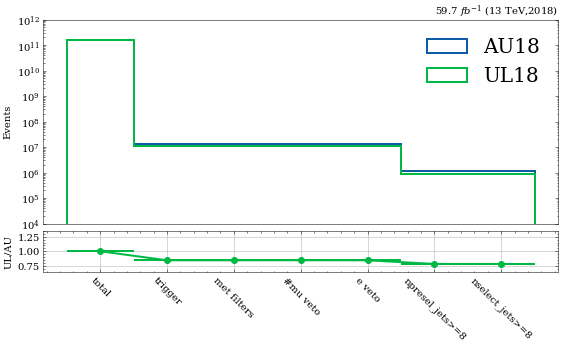

In [45]:
study.cutflow(
    [qcd_au18, qcd_ul18], 
    stacked=False,
    h_color=None,
    label=['AU18','UL18'], 
    legend=True,
    ylim=(1e4,1e12),
    legend_fontsize=20,
    legend_loc='upper right',
    size=(8,5),
    ratio=True,
    r_ylabel='UL/AU',
    r_inv=True,
    r_ylim=(0.65,1.35)
    # varlist=['n_jet','jet_pt[:,0]'],
    # efficiency=True,
)

100%|██████████| 2/2 [00:00<00:00,  3.55it/s]


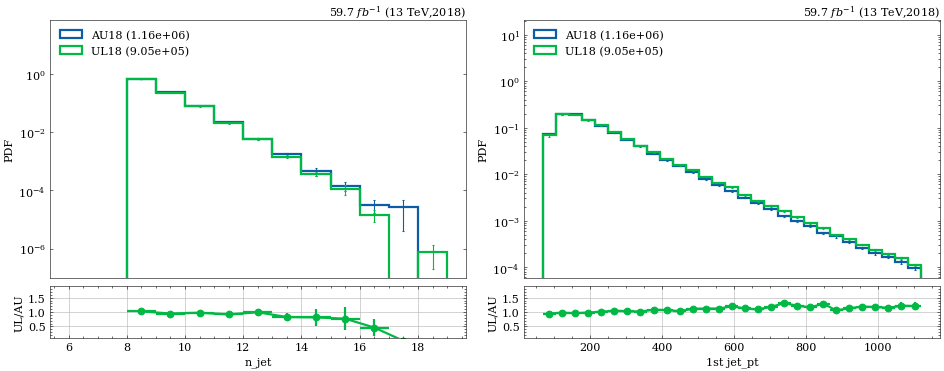

In [21]:
study.quick(
    [qcd_au18, qcd_ul18], 
    log=True,
    stacked=False,
    h_color=None,
    label=['AU18','UL18'], legend=True,
    varlist=['n_jet','jet_pt[:,0]'],
    binlist=[np.arange(6,20)],
    efficiency=True,
    ratio=True, r_ylabel='UL/AU', r_inv=True
)

100%|██████████| 3/3 [00:00<00:00,  4.47it/s]


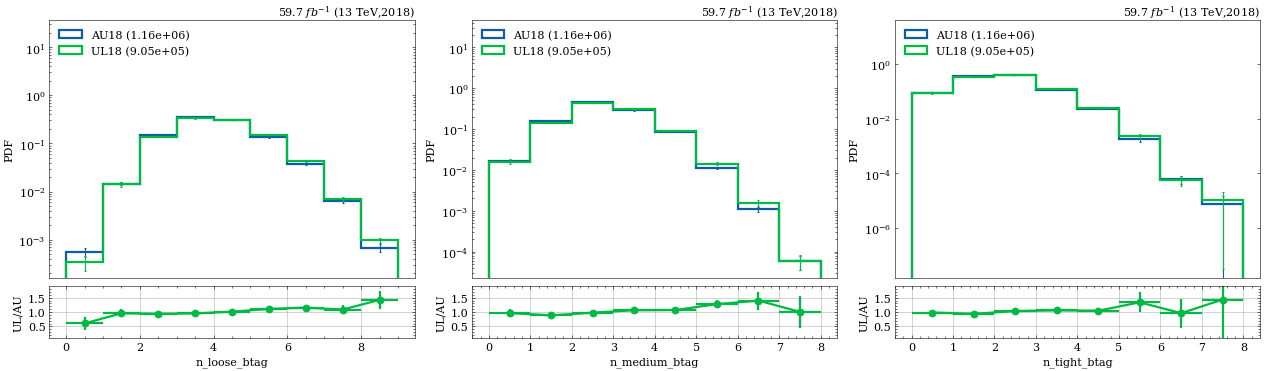

In [23]:
study.quick(
    [qcd_au18, qcd_ul18], 
    log=True,
    stacked=False,
    h_color=None,
    label=['AU18','UL18'], legend=True,
    varlist=['n_loose_btag','n_medium_btag','n_tight_btag'],
    dim=-1,
    # binlist=[np.arange(6,20)],
    efficiency=True,
    ratio=True, r_ylabel='UL/AU', r_inv=True
)

100%|██████████| 1/1 [00:01<00:00,  1.53s/it]


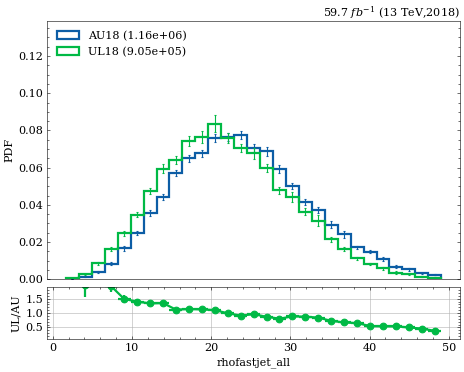

In [25]:
rhofastjet_ratio = obj_store()

study.quick(
    [qcd_au18, qcd_ul18], 
    stacked=False,
    h_color=None,
    label=['AU18','UL18'], legend=True,
    varlist=['rhofastjet_all'],
    # binlist=[np.arange(52)],
    efficiency=True,
    ratio=True, r_ylabel='UL/AU', r_inv=True,

    r_store=rhofastjet_ratio
)

In [34]:
rhofastjet_ratio = rhofastjet_ratio[0][0]

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

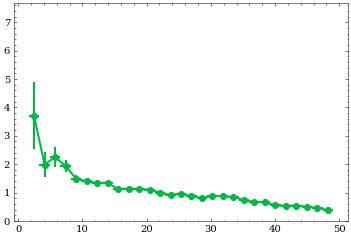

In [36]:
plot_graph(rhofastjet_ratio)

In [37]:
rhofastjet_sf = lambda t : rhofastjet_ratio.evaluate(t.rhofastjet_all)

100%|██████████| 1/1 [00:08<00:00,  8.30s/it]


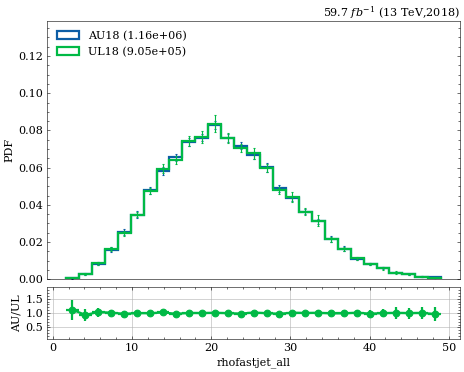

In [38]:
study.quick(
    [qcd_au18, qcd_ul18], 
    scale=[rhofastjet_sf],
    stacked=False,
    h_color=None,
    label=['AU18','UL18'], legend=True,
    varlist=['rhofastjet_all'],
    efficiency=True,
    ratio=True, r_ylabel='AU/UL', r_inv=True,
)

100%|██████████| 6/6 [00:01<00:00,  4.64it/s]


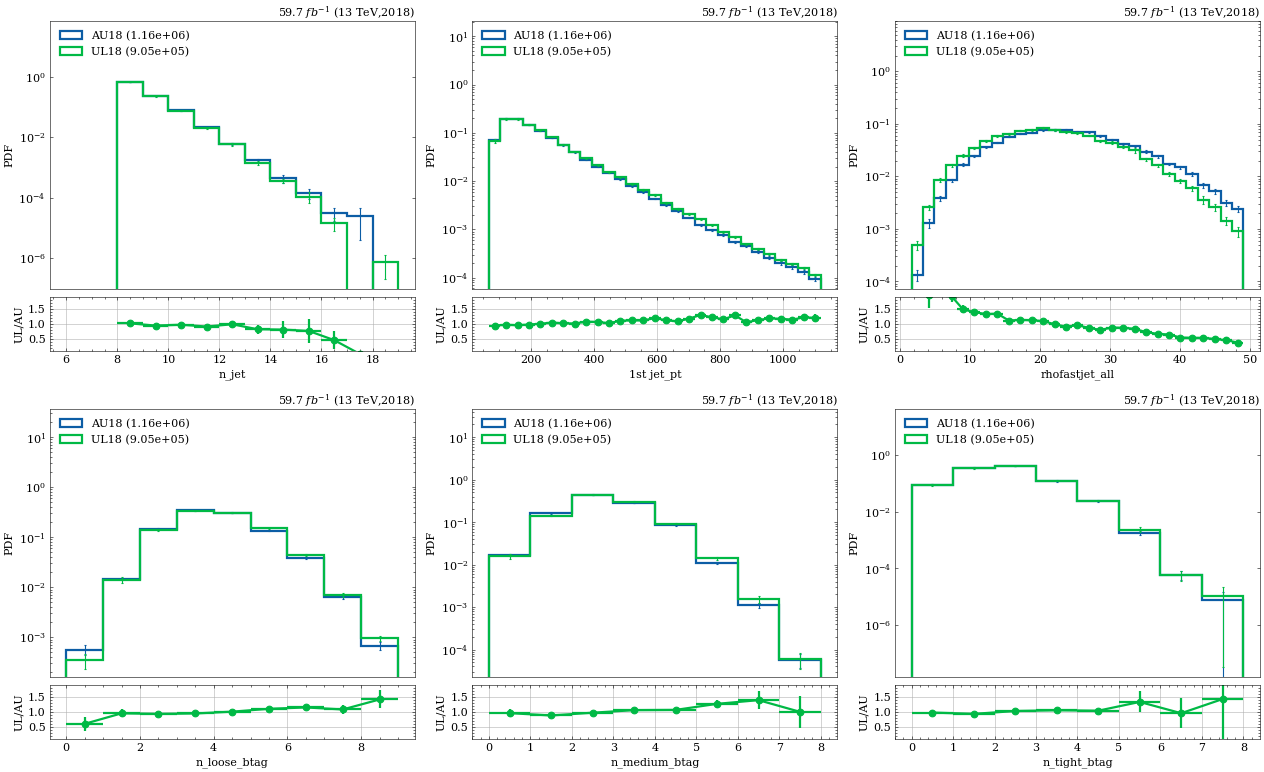

In [41]:
study.quick(
    [qcd_au18, qcd_ul18], 
    # scale=[rhofastjet_sf],
    log=True,
    stacked=False,
    h_color=None,
    label=['AU18','UL18'], legend=True,
    varlist=['n_jet','jet_pt[:,0]','rhofastjet_all','n_loose_btag','n_medium_btag','n_tight_btag'],
    binlist=[np.arange(6,20)],
    efficiency=True,
    ratio=True, r_ylabel='UL/AU', r_inv=True,
)

100%|██████████| 6/6 [00:01<00:00,  4.64it/s]


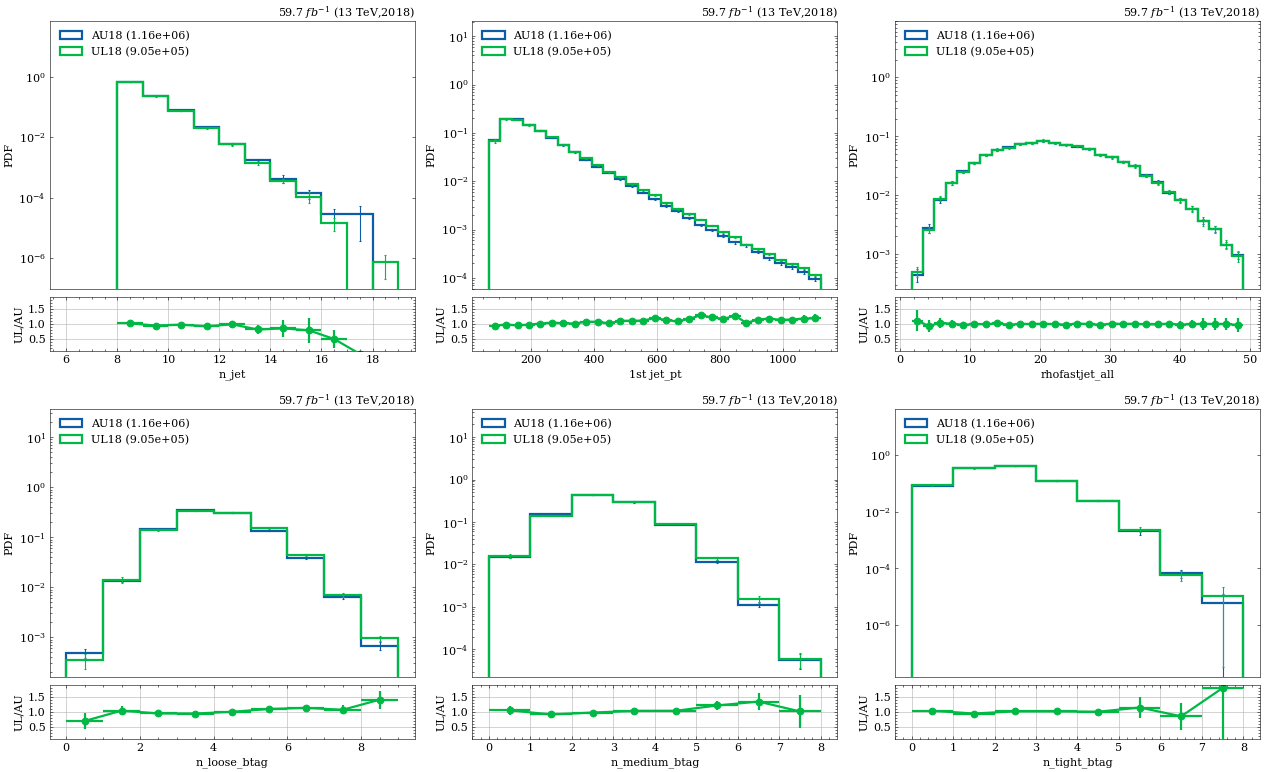

In [40]:
study.quick(
    [qcd_au18, qcd_ul18], 
    scale=[rhofastjet_sf],
    log=True,
    stacked=False,
    h_color=None,
    label=['AU18','UL18'], legend=True,
    varlist=['n_jet','jet_pt[:,0]','rhofastjet_all','n_loose_btag','n_medium_btag','n_tight_btag'],
    binlist=[np.arange(6,20)],
    efficiency=True,
    ratio=True, r_ylabel='UL/AU', r_inv=True,
)

In [6]:
ObjIter(new_qcd.filelist).sample

['QCD_bEnriched_HT100to200', 'QCD_bEnriched_HT200to300', 'QCD_bEnriched_HT300to500', 'QCD_bEnriched_HT500to700', 'QCD_bEnriched_HT700to1000', 'QCD_bEnriched_HT1000to1500', 'QCD_bEnriched_HT1500to2000', 'QCD_bEnriched_HT2000toInf', 'QCD_HT100to200_BGenFilter', 'QCD_HT200to300_BGenFilter', 'QCD_HT300to500_BGenFilter', 'QCD_HT500to700_BGenFilter', 'QCD_HT700to1000_BGenFilter', 'QCD_HT1000to1500_BGenFilter', 'QCD_HT1500to2000_BGenFilter', 'QCD_HT2000toInf_BGenFilter']

100%|██████████| 1/1 [00:02<00:00,  2.14s/it]


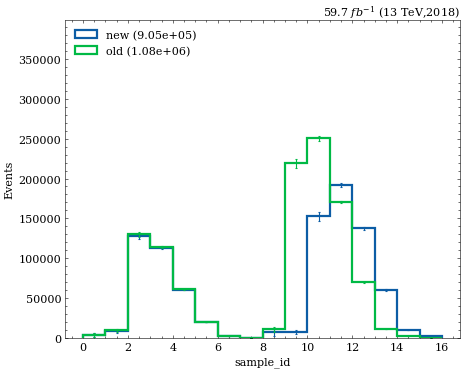

In [7]:
study.quick(
    [new_qcd, old_qcd], stacked=False,
    h_color=None,
    label=['new','old'], legend=True,
    varlist=['sample_id']
)

In [3]:
fc.eightb.preselection.t8btag_minmass.Run2_UL.RunIISummer20UL18NanoAODv9.TTJets

['/store/user/ekoenig/8BAnalysis/NTuples/2018/preselection/t8btag_minmass/Run2_UL/RunIISummer20UL18NanoAODv9/TTJets/TTJets/ntuple_0.root',
 '/store/user/ekoenig/8BAnalysis/NTuples/2018/preselection/t8btag_minmass/Run2_UL/RunIISummer20UL18NanoAODv9/TTJets/TTJets/ntuple_1.root',
 '/store/user/ekoenig/8BAnalysis/NTuples/2018/preselection/t8btag_minmass/Run2_UL/RunIISummer20UL18NanoAODv9/TTJets/TTJets/ntuple_2.root',
 '/store/user/ekoenig/8BAnalysis/NTuples/2018/preselection/t8btag_minmass/Run2_UL/RunIISummer20UL18NanoAODv9/TTJets/TTJets/ntuple_3.root',
 '/store/user/ekoenig/8BAnalysis/NTuples/2018/preselection/t8btag_minmass/Run2_UL/RunIISummer20UL18NanoAODv9/TTJets/TTJets/ntuple_4.root',
 '/store/user/ekoenig/8BAnalysis/NTuples/2018/preselection/t8btag_minmass/Run2_UL/RunIISummer20UL18NanoAODv9/TTJets/TTJets/ntuple_5.root',
 '/store/user/ekoenig/8BAnalysis/NTuples/2018/preselection/t8btag_minmass/Run2_UL/RunIISummer20UL18NanoAODv9/TTJets/TTJets/ntuple_6.root',
 '/store/user/ekoenig/8BAna

In [26]:
ttjet = Tree(fc.eightb.preselection.t8btag_minmass.Run2_UL.RunIISummer20UL18NanoAODv9.TTJets_new)

100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


In [27]:
tt = Tree(fc.eightb.preselection.t8btag_minmass.Run2_UL.RunIISummer20UL18NanoAODv9.TT)

100%|██████████| 16/16 [00:10<00:00,  1.53it/s]


In [30]:
ObjIter(ttjet.filelist).xsec, ObjIter(tt.filelist).xsec,

([750.5, 750.5, 750.5, 750.5, 750.5, 750.5, 750.5, 750.5],
 [687.1, 687.1, 687.1, 687.1, 687.1, 687.1, 687.1, 687.1, 687.1, 687.1, 687.1, 687.1, 687.1, 687.1, 687.1, 687.1])

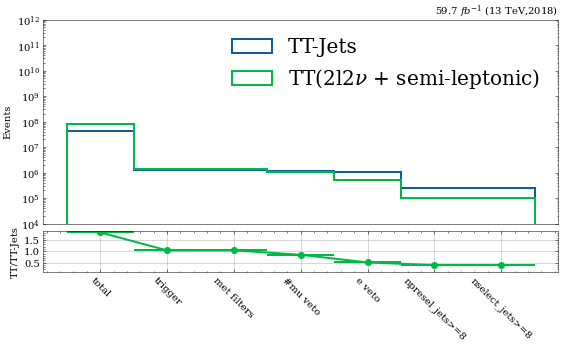

In [29]:
study.cutflow(
    [ttjet, tt], 
    stacked=False,
    h_color=None,
    label=['TT-Jets','TT(2l2$\\nu$ + semi-leptonic)'], 
    legend=True,
    ylim=(1e4,1e12),
    legend_fontsize=20,
    legend_loc='upper right',
    size=(8,5),
    ratio=True,
    r_ylabel='TT/TT-Jets',
    r_inv=True,
    # varlist=['n_jet','jet_pt[:,0]'],
    # efficiency=True,
)

In [14]:
new_ttbar.filelist[0].fname

'root://cmseos.fnal.gov//store/user/ekoenig/8BAnalysis/NTuples/2018/preselection/t8btag_minmass/Run2_UL/RunIISummer20UL18NanoAODv9/TTJets/TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8/ntuple_0.root'

100%|██████████| 2/2 [00:05<00:00,  2.62s/it]


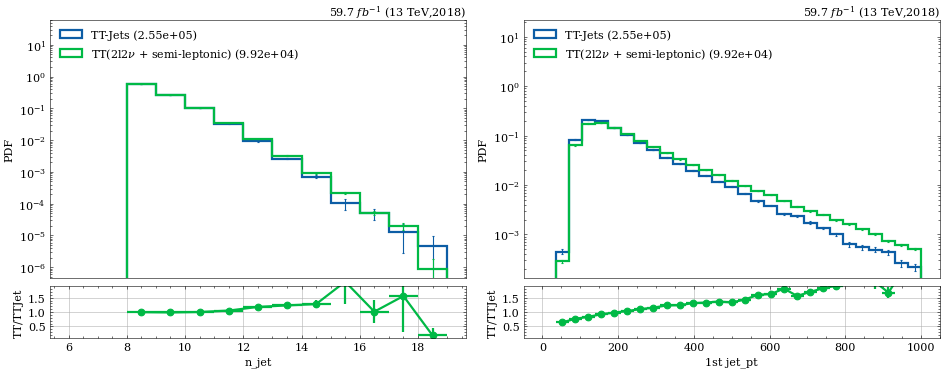

In [32]:
study.quick(
    [ttjet,tt], 
    log=True,
    stacked=False,
    h_color=None,
    label=['TT-Jets','TT(2l2$\\nu$ + semi-leptonic)'], legend=True,
    varlist=['n_jet','jet_pt[:,0]'],
    binlist=[np.arange(6,20),(0,1000,30)],
    efficiency=True,
    ratio=True, r_ylabel='TT/TTJet', r_inv=True
)

100%|██████████| 3/3 [00:16<00:00,  5.56s/it]


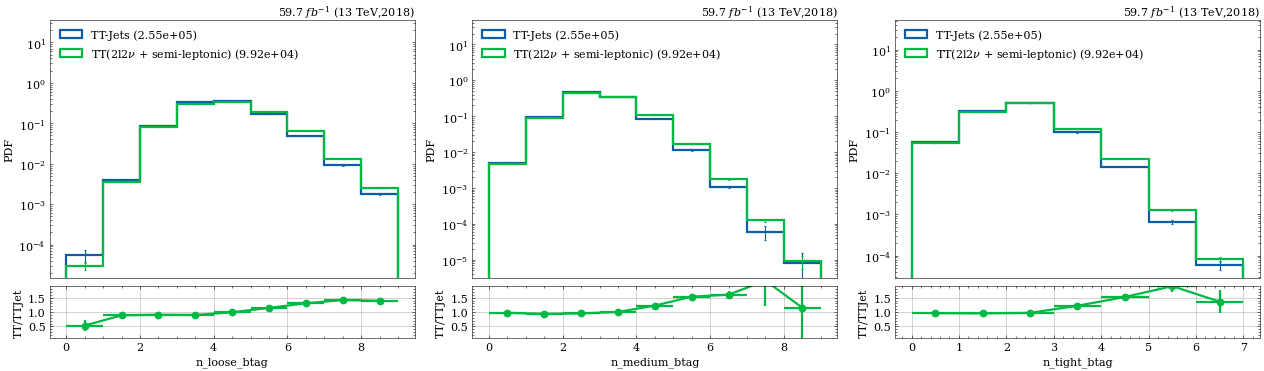

In [33]:
study.quick(
    [ttjet,tt], 
    log=True,
    stacked=False,
    h_color=None,
    label=['TT-Jets','TT(2l2$\\nu$ + semi-leptonic)'], legend=True,
    varlist=['n_loose_btag','n_medium_btag','n_tight_btag'],
    dim=-1,
    # binlist=[np.arange(6,20)],
    efficiency=True,
    ratio=True, r_ylabel='TT/TTJet', r_inv=True
)